In [9]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:

housing_data = pd.read_csv("Housing.csv")
housing_data
categorical = [obj for obj in housing_data.columns if housing_data[obj].dtype =='object']

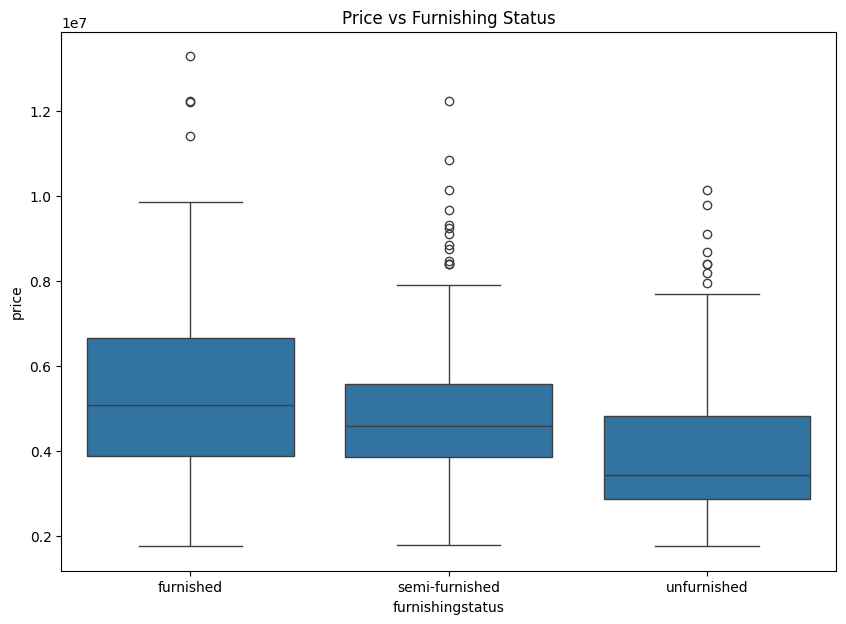

In [11]:

plt.figure(figsize=(10,7))
plt.title("Price vs Furnishing Status")
sns.boxplot(x = "furnishingstatus", y ="price", data = housing_data)
plt.show()

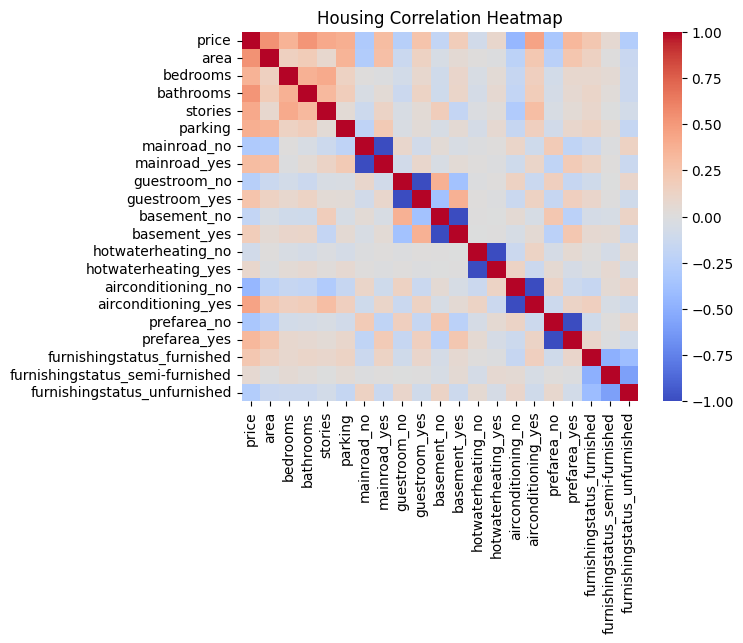

In [12]:
encoded_data = pd.get_dummies( housing_data,columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])
encoded_data.columns
sns.heatmap(encoded_data.corr(), cmap='coolwarm')
plt.title('Housing Correlation Heatmap')
plt.show()

#Housing Price Prediction Regression Analysis 

In [13]:

prediction_target = housing_data.price
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 
            'basement', 'hotwaterheating', 'airconditioning', 
            'parking', 'prefarea', 'furnishingstatus']

X = housing_data[features]
X_train, X_valid, y_train, y_valid = train_test_split(X, prediction_target, random_state=0)

X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
ordinal_encoder = OrdinalEncoder()
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]
X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

print("MAE (Random Forest Regressor): ", score_dataset(X_train, X_valid, y_train, y_valid))

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=5)
my_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)

predictions = my_model.predict(X_valid)
print("MAE (XGBRegressor): ", mean_absolute_error(predictions, y_valid))

MAE (Random Forest Regressor):  845083.4085158152
MAE (XGBRegressor):  831572.5054744525


#XGBRegressor has a lower Mean Absolute Error

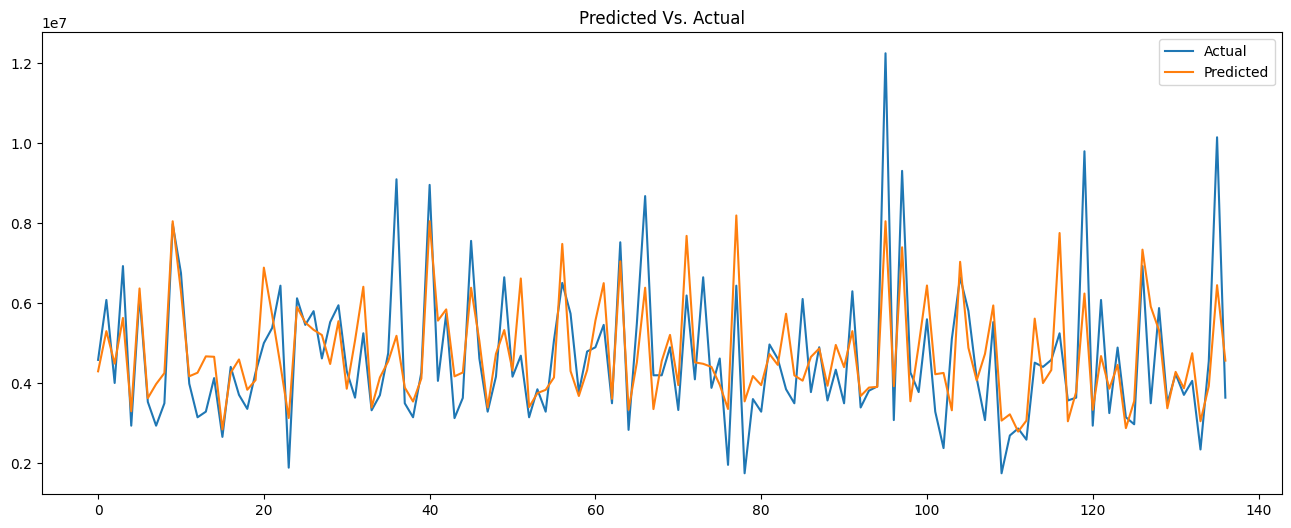

In [15]:
plt.figure(figsize=(16,6))
plt.title("Predicted Vs. Actual")
plt.plot(np.arange(len(y_valid)), y_valid, label='Actual')
plt.plot(np.arange(len(y_valid)), predictions, label='Predicted')
plt.legend()
plt.show()